In [14]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set visual style
sns.set_style('whitegrid')


In [15]:
# Load the stock codes
file_path = '../data/raw/DaftarSaham.csv'
stock_info = pd.read_csv(file_path)

# Display the first few rows of the stock information
stock_info.head()

,Code,Name,ListingDate,Shares,ListingBoard,Sector,LastPrice,MarketCap,MinutesFirstAdded,MinutesLastUpdated,HourlyFirstAdded,HourlyLastUpdated,DailyFirstAdded,DailyLastUpdated
0,AALI,Astra Agro Lestari Tbk.,1997-12-09,1.924688e+09,Utama,Consumer Non-Cyclicals,8000.0,1.539751e+13,2021-11-01 09:00:00,2023-01-06 15:59:00,2020-04-16 09:00:00,2023-01-06 15:00:00,2001-04-16,2023-01-06
1,ABBA,Mahaka Media Tbk.,2002-04-03,3.935893e+09,Pengembangan,Consumer Cyclicals,142.0,5.588968e+11,2021-11-01 09:00:00,2023-01-06 15:59:00,2020-04-16 09:00:00,2023-01-06 15:00:00,2002-04-03,2023-01-06
2,ABDA,Asuransi Bina Dana Arta Tbk.,1989-07-06,6.208067e+08,Pengembangan,Financials,6700.0,4.159405e+12,2021-11-01 09:00:00,2022-11-11 15:59:00,2020-04-16 09:00:00,2022-11-11 16:00:00,2001-04-16,2023-01-06
3,ABMM,ABM Investama Tbk.,2011-12-06,2.753165e+09,Utama,Industrials,3050.0,8.397153e+12,2021-11-01 09:00:00,2023-01-06 15:59:00,2020-04-16 09:00:00,2023-01-06 15:00:00,2011-12-06,2023-01-06
4,ACES,Ace Hardware Indonesia Tbk.,2007-11-06,1.715000e+10,Utama,Consumer Cyclicals,490.0,8.403500e+12,2021-11-01 09:00:00,2023-01-06 15:59:00,2020-04-16 09:00:00,2023-01-06 15:00:00,2007-11-06,2023-01-06


In [16]:
# Data overview
print("Shape of the stock information dataset:", stock_info.shape)
print("\nData types:\n", stock_info.dtypes)
print("\nMissing values:\n", stock_info.isnull().sum())

Shape of the stock information dataset: (829, 14)

Data types:
 Code                   object
Name                   object
ListingDate            object
Shares                float64
ListingBoard           object
Sector                 object
LastPrice             float64
MarketCap             float64
MinutesFirstAdded      object
MinutesLastUpdated     object
HourlyFirstAdded       object
HourlyLastUpdated      object
DailyFirstAdded        object
DailyLastUpdated       object
dtype: object

Missing values:
 Code                   0
Name                   0
ListingDate            0
Shares                 0
ListingBoard           0
Sector                 0
LastPrice              5
MarketCap              5
MinutesFirstAdded     42
MinutesLastUpdated    42
HourlyFirstAdded      23
HourlyLastUpdated     23
DailyFirstAdded        5
DailyLastUpdated       5
dtype: int64


In [ ]:
# Format: ROOT/data/raw/daily/{code}
def load_stock_data(stock_code):
    """Load daily stock data for a given stock code."""
    file_path = f'../data/raw/daily/{stock_code}.csv'
    if os.path.exists(file_path):
        stock_data = pd.read_csv(file_path)
        stock_data['timestamp'] = pd.to_datetime(stock_data['timestamp'])
        stock_data.set_index('timestamp', inplace=True)
        return stock_data
    else:
        print(f"File for stock code {stock_code} not found.")
        return None

In [ ]:
# Load data for a specific stock code
stock_code = 'AALI' # Change this to other code to analyze the stock data (can be seen in DailySaham.csv file)
stock_data = load_stock_data(stock_code)

# Display the first few rows of the stock data
if stock_data is not None:
    stock_data.head()

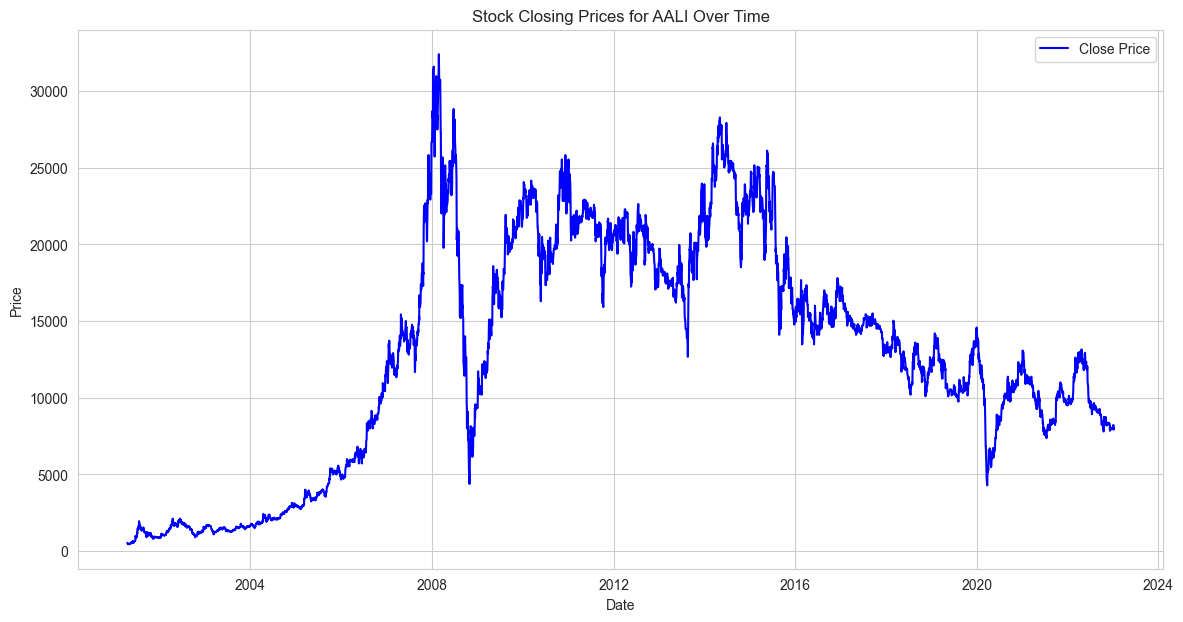

In [19]:
if stock_data is not None:
    # Plotting the closing prices
    plt.figure(figsize=(14, 7))
    plt.plot(stock_data['close'], color='blue', label='Close Price')
    plt.title(f'Stock Closing Prices for {stock_code} Over Time')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

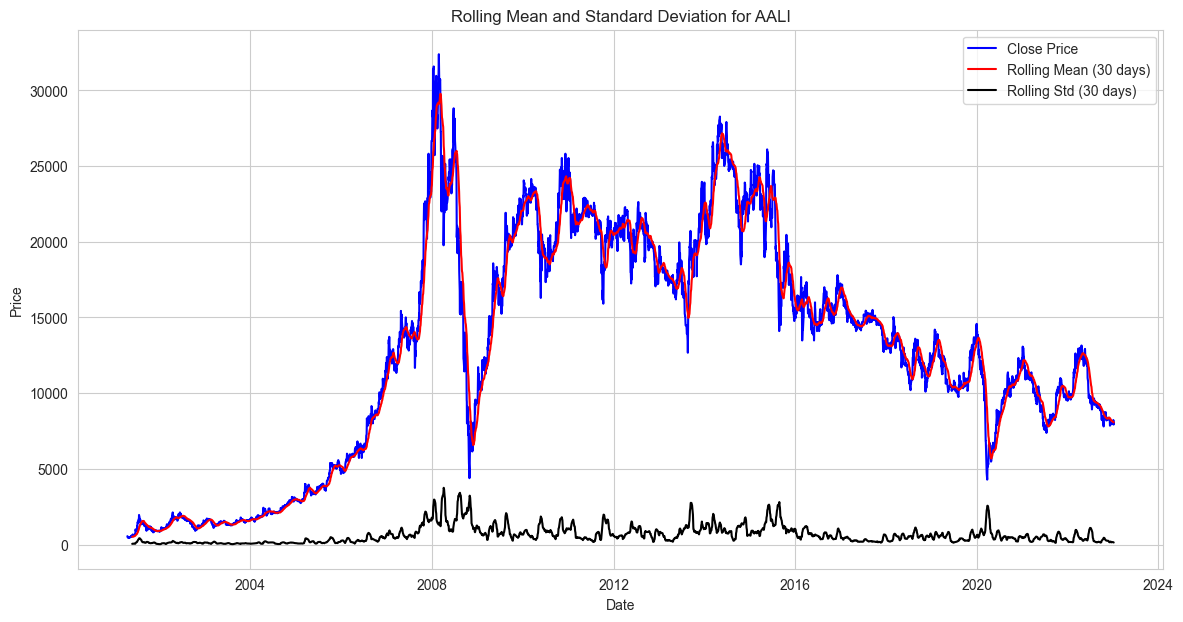

In [20]:
if stock_data is not None:
    # Rolling mean and standard deviation
    rolling_mean = stock_data['close'].rolling(window=30).mean()
    rolling_std = stock_data['close'].rolling(window=30).std()

    # Plotting rolling statistics
    plt.figure(figsize=(14, 7))
    plt.plot(stock_data['close'], color='blue', label='Close Price')
    plt.plot(rolling_mean, color='red', label='Rolling Mean (30 days)')
    plt.plot(rolling_std, color='black', label='Rolling Std (30 days)')
    plt.title(f'Rolling Mean and Standard Deviation for {stock_code}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

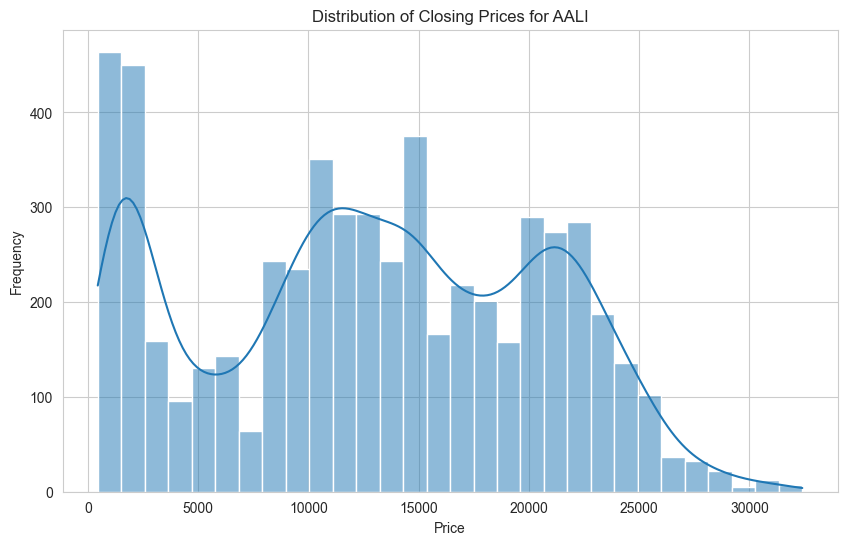

In [21]:
if stock_data is not None:
    # Distribution of closing prices
    plt.figure(figsize=(10, 6))
    sns.histplot(stock_data['close'], bins=30, kde=True)
    plt.title(f'Distribution of Closing Prices for {stock_code}')
    plt.xlabel('Price')
    plt.ylabel('Frequency')
    plt.show()

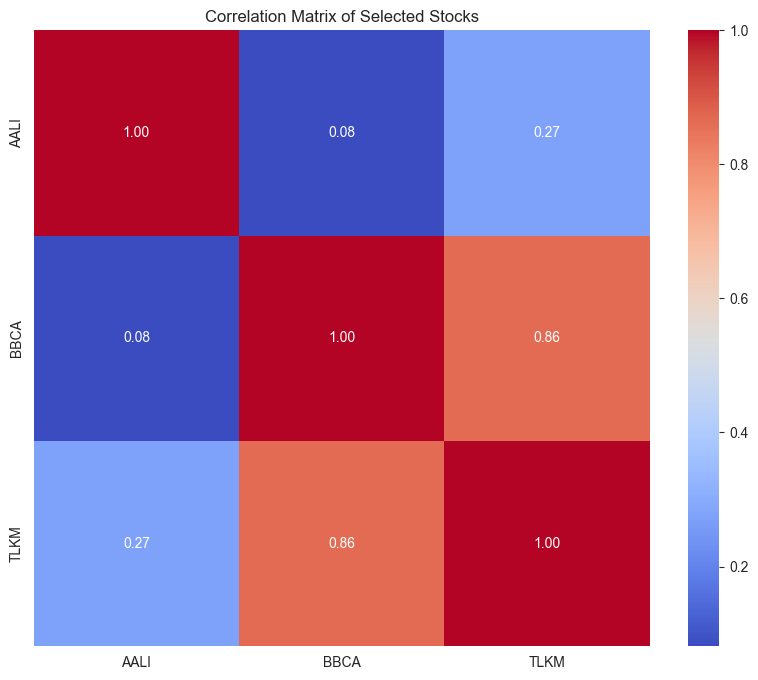

In [ ]:
# Load multiple stock data for correlation analysis
stock_codes = ['AALI', 'BBCA', 'TLKM']
all_stock_data = {}

for code in stock_codes:
    data = load_stock_data(code)
    if data is not None:
        all_stock_data[code] = data['close']

# Create a DataFrame for correlation analysis
correlation_df = pd.DataFrame(all_stock_data)
correlation_matrix = correlation_df.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Selected Stocks')
plt.show()